# Decision Tree - Drug 200

## Basic EDA

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [2]:
# read file using read_csv function
df = pd.read_csv('./dataset/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
# summary statistics for numeric data types
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
# summary statistics for object data types
df.describe(include=['O'])

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [5]:
# data type of each column
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
# number of rows and columns
df.shape

(200, 6)

In [8]:
# count of duplicate rows
df[df.duplicated()].shape

(0, 6)

## Decision Tree

In [9]:
# count of unique values for Drug column in the Dataframe
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [10]:
# preprocessing provides collection of functions and classes for preprocessing and transforming data before it is used in machine learning models
from sklearn import preprocessing

# we are transforming the data into numbers because the DecisionTreeClassifier algorithm works with numnerical data and cannot handle categorical data directly

# using LabelEncoder to convert Sex, BP, Cholestrol, Na_to_K, Drug into numbers
label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
#df['Na_to_K'] = label_encoder.fit_transform(df['Na_to_K'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [11]:
df['Sex'].value_counts(), df['BP'].value_counts(), df['Cholesterol'].value_counts(), df['Na_to_K'].value_counts(), df['Drug'].value_counts()

(Sex
 1    104
 0     96
 Name: count, dtype: int64,
 BP
 0    77
 1    64
 2    59
 Name: count, dtype: int64,
 Cholesterol
 0    103
 1     97
 Name: count, dtype: int64,
 Na_to_K
 12.006    2
 18.295    2
 25.355    1
 11.939    1
 16.347    1
          ..
 24.658    1
 24.276    1
 13.967    1
 19.675    1
 11.349    1
 Name: count, Length: 198, dtype: int64,
 Drug
 4    91
 3    54
 0    23
 2    16
 1    16
 Name: count, dtype: int64)

In [12]:
# display first few rows of a Datafrome. Default is 5
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [13]:
# iloc allows us to access specific rows and columns in a Dataframe by using integer indices
df.iloc[:, 0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [14]:
x = df.iloc[:,0:5]
y = df.iloc[:,5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [15]:
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32

In [16]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 5), (40, 5), (160,), (40,))

In [18]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
135,74,1,1,1,11.939
73,41,0,2,1,22.905
157,53,1,1,0,22.963
28,39,0,1,1,22.697
23,48,0,1,0,15.036
79,32,0,1,1,10.840
54,68,0,0,1,10.189
3,28,0,2,0,7.798
114,20,0,2,1,9.281
124,53,0,0,1,12.495


In [19]:
y_test

135    3
73     4
157    4
28     4
23     4
79     3
54     1
3      3
114    3
124    1
180    4
111    3
182    3
64     1
9      4
68     4
35     3
45     3
89     4
47     2
177    4
126    4
142    1
7      2
12     4
32     3
181    3
136    1
105    3
178    4
48     4
190    4
112    3
81     3
95     3
43     3
158    2
187    0
99     4
65     4
Name: Drug, dtype: int32

### Building Decision Tree Classifier using Entropy as a Criterion

In [20]:
# import the decisiontree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# Train the classifier on the training data
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.625, 0.9, 'x[4] <= 14.829\nentropy = 1.962\nsamples = 160\nvalue = [22, 11, 13, 39, 75]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.816\nsamples = 85\nvalue = [22, 11, 13, 39, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.918\nsamples = 33\nvalue = [22, 11, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.811\nsamples = 52\nvalue = [0, 0, 13, 39, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.995\nsamples = 24\nvalue = [0, 0, 13, 11, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 75\nvalue = [0, 0, 0, 0, 75]')]

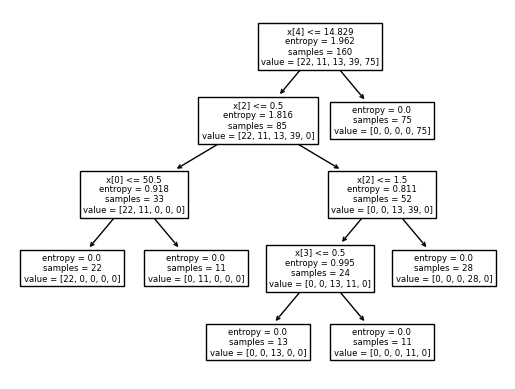

In [21]:
# visualizing decision tree
from sklearn import tree
tree.plot_tree(model)

[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.962\nsamples = 160\nvalue = [22, 11, 13, 39, 75]\nclass = drugC'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.816\nsamples = 85\nvalue = [22, 11, 13, 39, 0]\nclass = drugB'),
 Text(0.25, 0.5, 'age <= 50.5\nentropy = 0.918\nsamples = 33\nvalue = [22, 11, 0, 0, 0]\nclass = drugY'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'BP <= 1.5\nentropy = 0.811\nsamples = 52\nvalue = [0, 0, 13, 39, 0]\nclass = drugB'),
 Text(0.625, 0.3, 'cholesterol <= 0.5\nentropy = 0.995\nsamples = 24\nvalue = [0, 0, 13, 11, 0]\nclass = drugA'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]\nclass = drugA'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]\nclass = drugB'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]\nclass = drugB'),
 T

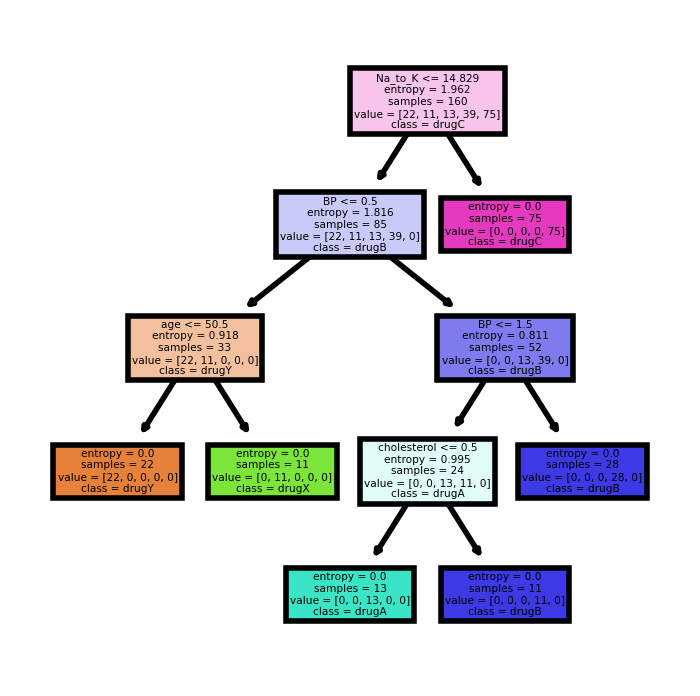

In [22]:
# visualizing decision tree with different parameters

fn = ['age', 'sex', 'BP', 'cholesterol', 'Na_to_K']
cn = ['drugY', 'drugX', 'drugA', 'drugB', 'drugC']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)

### Prediction on Test data

In [24]:
# make predictions on the test data

preds = model.predict(x_test)
preds

array([3, 4, 4, 4, 4, 3, 1, 3, 3, 1, 4, 3, 3, 1, 4, 4, 3, 3, 4, 2, 4, 4,
       1, 2, 4, 3, 3, 1, 3, 4, 4, 4, 3, 3, 3, 3, 2, 0, 4, 4])

In [25]:
# convert to Pandas Series and get value counts

pd.Series(preds).value_counts()

4    16
3    15
1     5
2     3
0     1
Name: count, dtype: int64

### Crosstab : Way to understand the two way table between predicted vs actual

In [29]:
pd.crosstab(y_test, preds, rownames=['Drug (actual)'], colnames=['Drug (predicted)'], margins=True, margins_name='Total')

Drug (predicted),0,1,2,3,4,Total
Drug (actual),,,,,,
0,1,0,0,0,0,1
1,0,5,0,0,0,5
2,0,0,3,0,0,3
3,0,0,0,15,0,15
4,0,0,0,0,16,16
Total,1,5,3,15,16,40


### Accuracy of the above model

In [38]:
from sklearn.metrics import accuracy_score

# evaluating the model's accuracy
accuracy = accuracy_score(y_test, preds, normalize=True)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [39]:
#element-wise comparison between the elements of the preds array and the y_test array

mean_accuracy = np.mean(preds == y_test)
print(f"Accuracy: {mean_accuracy}")

Accuracy: 1.0


In [40]:
# plotting the preds and y_test in the table for better understanding of how the values are compared and represented in the crosstab method

x_test['preds'] = preds
x_test['y_test'] = y_test
x_test

,Age,Sex,BP,Cholesterol,Na_to_K,preds,y_test
135,74,1,1,1,11.939,3,3
73,41,0,2,1,22.905,4,4
157,53,1,1,0,22.963,4,4
28,39,0,1,1,22.697,4,4
23,48,0,1,0,15.036,4,4
79,32,0,1,1,10.840,3,3
54,68,0,0,1,10.189,1,1
3,28,0,2,0,7.798,3,3
114,20,0,2,1,9.281,3,3
124,53,0,0,1,12.495,1,1
